In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from IPython.display import HTML
import math
%matplotlib inline

In [19]:
#img = cv2.imread('Lane1.png') 
img5 = cv2.imread('Lane5.jpg') 
print(img5)

[[[202 158 104]
  [202 158 104]
  [202 158 104]
  ..., 
  [200 156  97]
  [198 154  95]
  [196 152  93]]

 [[202 158 104]
  [202 158 104]
  [202 158 104]
  ..., 
  [199 155  96]
  [197 153  94]
  [195 151  90]]

 [[201 157 103]
  [202 158 104]
  [202 159 102]
  ..., 
  [199 155  94]
  [197 153  92]
  [195 151  90]]

 ..., 
 [[110 102 102]
  [110 102 102]
  [110 102 102]
  ..., 
  [ 93  82  78]
  [ 93  82  78]
  [ 93  82  78]]

 [[109 101 102]
  [109 101 102]
  [109 101 102]
  ..., 
  [ 91  82  78]
  [ 90  81  77]
  [ 90  81  77]]

 [[106  98  99]
  [106  98  99]
  [106  98  99]
  ..., 
  [ 90  81  77]
  [ 90  81  77]
  [ 90  81  77]]]


In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [6]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)

In [7]:
edges = cv2.Canny(blur_gray, 50, 150)

In [8]:
width = img.shape[1]
height = img.shape[0] 

In [9]:
vertices = np.array([[ (150, height) , (450,320), (490,320) , (width, height) ]], dtype = np.int32)

In [10]:
#Image mask     
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        channel_count = img.shape[2] 
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [11]:
mask = region_of_interest(edges, vertices)

In [12]:
def avg_lines(lines):
    try:
        x = [line[0] for line in lines]
        y = [line[1] for line in lines]
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y)[0]
        x = np.array(x)
        y = np.array(x * m + c).astype('int')
        return x,y,m,c
    except:
        print(x,y)
    

def draw_lines(img, lines, color=[255,0, 0], thickness=10):
    left_ms = []
    right_ms = []
    left_lines = []
    right_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = ((y2- y1)/(x2 - x1))
            if slope > 0:
                right_ms.append(slope)
                right_lines.append((x1,y1))
                right_lines.append((x2,y2))
            elif slope < 0:
                left_ms.append(slope)
                left_lines.append((x1,y1))
                left_lines.append((x2,y2))
    if len(right_lines) == 0 or len(left_lines) == 0:
        return;            
    right_x, right_y ,right_m, right_c =  avg_lines(right_lines)
    left_x, left_y, left_m, left_c = avg_lines(left_lines)
    top_y = min(min(left_y), min(right_y))
    left_top_x = int((top_y - left_c)/ (left_m))
    left_bottom_y = img.shape[0]
    left_bottom_x = int((left_bottom_y - left_c)/(left_m))
    cv2.line(img, (left_bottom_x, left_bottom_y), (left_top_x, top_y), color, thickness)
    top_y = min(min(left_y), min(right_y))
    right_top_x = int((top_y - right_c)/(right_m))
    right_bottom_y = img.shape[0]
    right_bottom_x = int((right_bottom_y - right_c) /(right_m))
    cv2.line(img, (right_top_x, top_y), (right_bottom_x, right_bottom_y), color, thickness)

In [13]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

In [14]:
lines = hough_lines(mask, 1, np.pi/180 ,20, 5, 5)

In [15]:
color_img = np.dstack((lines,lines,lines))

In [16]:
final_img = cv2.addWeighted(img, 0.8, lines, 1., 0.)

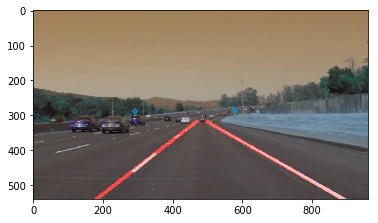

In [17]:
plt.imshow(final_img)